<a href="https://colab.research.google.com/github/narayana111100/capstone-project-2/blob/main/50_startups_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import TweedieRegressor
from scipy.stats import skew
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [ ]:
df = pd.read_csv("/content/50_Startups.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
print("Numbers of row and columns in data : ",df.shape)

Numbers of row and columns in data :  (50, 4)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
df.isnull().sum()   #---- no null values are present

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
Profit             50
dtype: int64

## EDA

In [ ]:
#pip install dataprep

In [ ]:
#from dataprep.eda import plot
#plot(df)

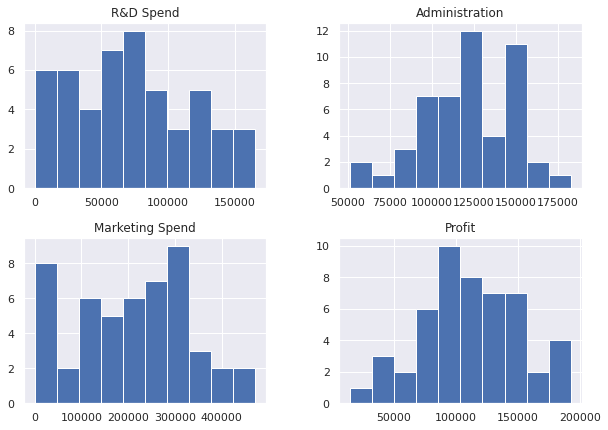

In [ ]:

df.hist(figsize=(10,7))
plt.show()

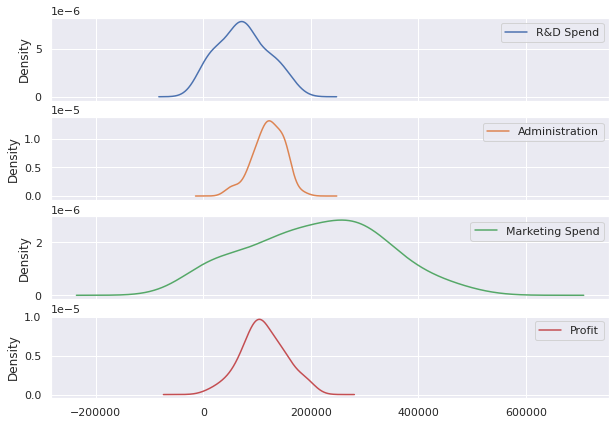

In [ ]:
df.plot(kind='density',subplots =True,figsize=(10,7))
plt.show()

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
feature_values = {col:df[col].nunique() for col in df.columns}
feature_values

{'R&D Spend': 49, 'Administration': 50, 'Marketing Spend': 48, 'Profit': 50}

In [ ]:
df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


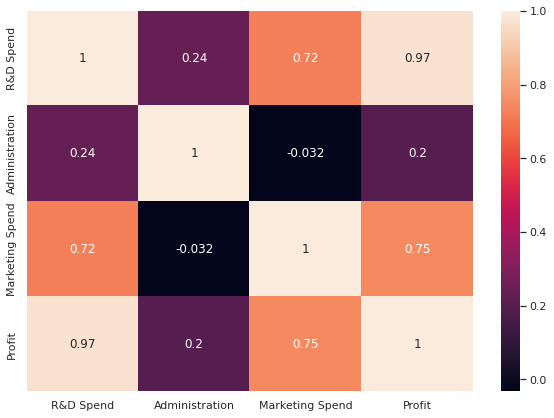

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

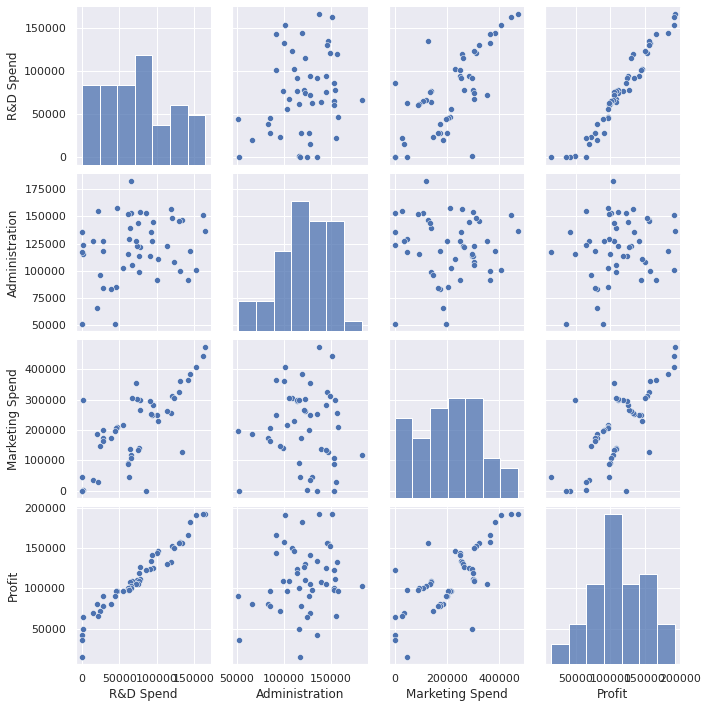

In [ ]:
sns.pairplot(df)

 profit and R&D are highly correlated to each other

## FINDING SKEWNESS IN DATA

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
df.skew()

R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

R&D Spend
0.15904052321503395


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


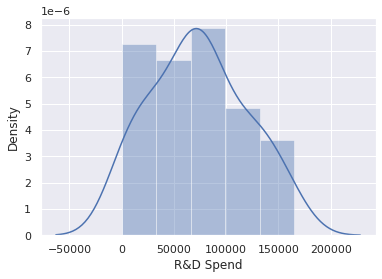

Administration
-0.4742300698920047


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


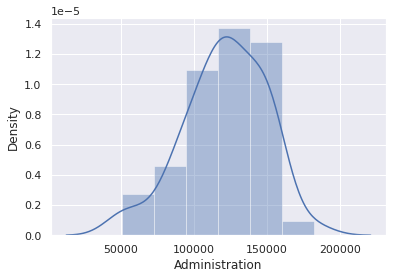

Marketing Spend
-0.04506631617666136


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


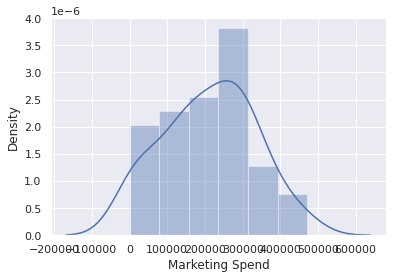

Profit
0.02258638356958943


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


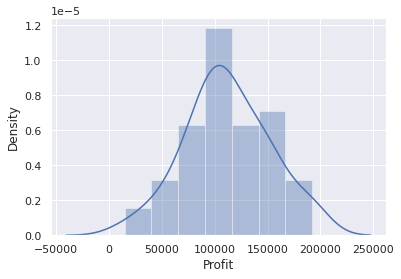

In [ ]:
for col in df:
  print(col)
  print(skew(df[col]))

  plt.figure()
  sns.distplot(df[col])
  plt.show()


their is no skewness in the data

FINDING OUTLIER IN THE PRESENT DATA

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
def outlier(value):

  Q1 = value.quantile(0.25)
  Q3 = value.quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  plot2 = value.plot.box(autorange=True)
  lower_limit,upper_limit
  print("IQR,lower_limit,upper_limit")
  return IQR,lower_limit,upper_limit,plot2

## R&D Spend

IQR,lower_limit,upper_limit


(61666.43,
 -52563.275,
 194102.445,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe294e22510>)

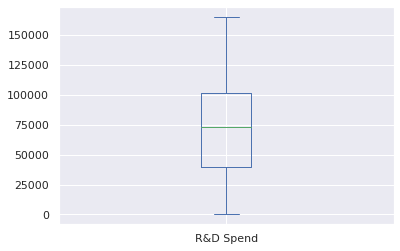

In [ ]:
outlier(df['R&D Spend'])

## Administration

IQR,lower_limit,upper_limit


(41111.30499999999,
 42063.91750000001,
 206509.13749999998,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe294df9d90>)

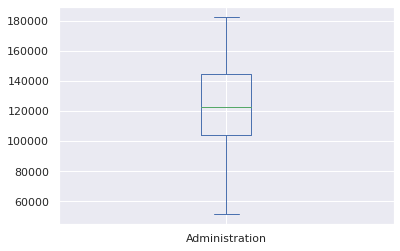

In [ ]:
outlier(df['Administration'])

# Marketing Spend

IQR,lower_limit,upper_limit


(170168.95249999996,
 -125953.29624999993,
 554722.5137499999,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe294d6c650>)

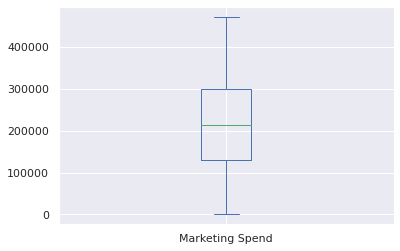

In [ ]:
outlier(df['Marketing Spend'])

## Profit

IQR,lower_limit,upper_limit


(49627.07499999998,
 15698.290000000023,
 214206.58999999997,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe294cdd3d0>)

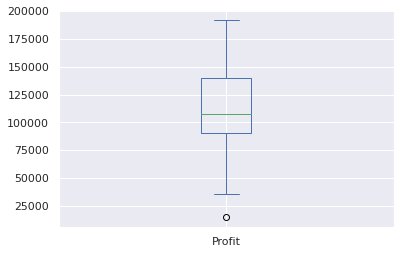

In [ ]:
outlier(df['Profit'])

RESOLVING OUTLIER OF PROFIT

In [ ]:
def outlier_re(value2):
  Q1 = value2.quantile(0.25)
  Q3 = value2.quantile(0.75)
  IQR = Q3-Q1
  lower_limit =  Q1- 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  lower_limit,upper_limit
  resolve_outlier = df[(value2<lower_limit)|(value2>upper_limit)].head()
  return resolve_outlier

In [ ]:
outlier_re(df['Profit'])

,R&D Spend,Administration,Marketing Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [ ]:
Q1= df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['Profit']<lower_limit)|(df['Profit']>upper_limit)]

In [ ]:
no_outlier = df[(df['Profit']>lower_limit)&(df['Profit']<upper_limit)]

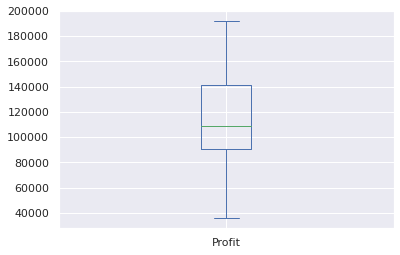

In [ ]:
no_outlier['Profit'].plot.box()

80/20 Split

In [ ]:
X = df.drop(['Profit'],axis=1)
y = df['Profit']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state = 0)

## HyperParameter Tunning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV

In [ ]:
model_params = {
    'random_forest':{
        'model':RandomForestRegressor(),
        'params': {
            'n_estimators': [20,60,100,120],
             'max_features': ['auto', 'sqrt'],
             
                'min_samples_leaf':[1, 2]
        }
    },
    'Xgboost':{
        'model':xgb.XGBRegressor(),
        'params':{
            'n_estimators':[500]
        }
    },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
    },
    'LINEAR REGRESSION':{
        'model':LinearRegression(),
        'params':{
            'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
        }
    },
    'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
    }
}

In [ ]:
scores = []
for model_name,mp in model_params.items():
  clf1 = GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)
  clf1.fit(X_train,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf1.best_score_,
      'best_params':clf1.best_params_
  })

[11:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

In [ ]:
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,random_forest,0.852029,"{'max_features': 'auto', 'min_samples_leaf': 1..."
1,Xgboost,0.844370,{'n_estimators': 500}
2,decision_tree,0.733133,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,LINEAR REGRESSION,0.904259,"{'copy_X': True, 'fit_intercept': True, 'norma..."
4,lasso,0.904259,"{'alpha': 1, 'selection': 'random'}"


## LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [ ]:
lr.score(X_test,y_test)

0.932245761263358

In [ ]:
# test prediction
y_predict=lr.predict(X_test)
y_predict

array([103788.39105804, 134232.16033133, 135016.93713064,  71906.02228373,
       182417.44789376, 114705.53397195,  65868.5985353 ,  98239.82399655,
       114641.25782063, 171672.55426751,  96404.92149824,  87992.79207473,
       111069.06515085,  89993.7261266 , 128750.79708414, 161845.63286621,
       151560.52519393,  45792.41695937,  43860.46305344, 102477.74494986])

In [ ]:
y_test.values

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94,  96778.92,  96479.51,
       105733.54,  96712.8 , 124266.9 , 155752.6 , 132602.65,  64926.08,
        35673.41, 101004.64])

In [ ]:
data = pd.DataFrame(data={"Predicted Profit":y_predict.flatten(),'Actual value':y_test})
data.head()

,Predicted Profit,Actual value
28,103788.391058,103282.38
11,134232.160331,144259.40
10,135016.937131,146121.95
41,71906.022284,77798.83
2,182417.447894,191050.39


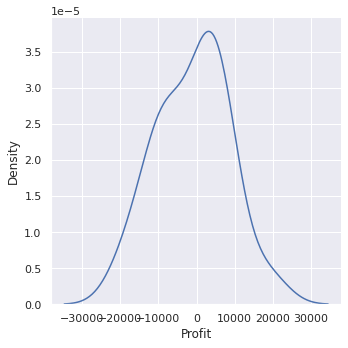

In [ ]:
# to see prediction right or wrong we should compare y_predict and truth value y_test
sns.displot(y_predict-y_test, kind ='kde')

In [ ]:
# the graph is normally distributed from -2000 to 2000  not much variance in the model hence model is working good

MEAN ABSOLUTE ERROR OF LINEAR REGRESSION

 MEAN ABSOLUTE ERROR (MAE) -  Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.



In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_predict)
print("Mean absolute value : ", mae)


Mean absolute value :  7549.776328970957


## MEAN SQUARED ERROR
MSE – Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the residual.

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print("Mean sqaured value : ", mse)


Mean sqaured value :  85505430.08966327


# Root Mean Squared Error
his is similar to the Mean squared error(MSE) approach, the only difference is that here we find the root of the mean squared error i.e. root of the Mean squared error is equal to Root Mean Squared Error. The reason behind finding the root is to find the more close residual to the values found by mean squared error.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_predict, y_test))
print("Root Mean Squarred Error is : ",rmse)

Root Mean Squarred Error is :  9246.914625412266


## R2_score linearRegression

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_predict,y_test)
print("R2 score for the model is :", score*100)   #-----R2 score: R2 score – R squared score. It is one of the statistical approaches by which we can find the variance or the spread of the target and feature data.

R2 score for the model is : 93.94944439824067


R square value is 93.94% .This means our model explains 83.32% of variation from the data.This means model is good enough for deployment

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
rf.score(X_test,y_test)

0.9422769306949489

In [ ]:
y_predict_rf = rf.predict(X_test)
y_predict_rf

array([108697.6633, 136326.8277, 136254.5161,  80898.7959, 183154.2052,
       116884.5339,  73959.2402, 101372.8099, 115384.846 , 165872.4655,
       100735.6328,  89640.4966, 116157.8316,  90430.73  , 131607.301 ,
       152426.9679, 145865.8245,  43604.1031,  39061.885 , 107590.9178])

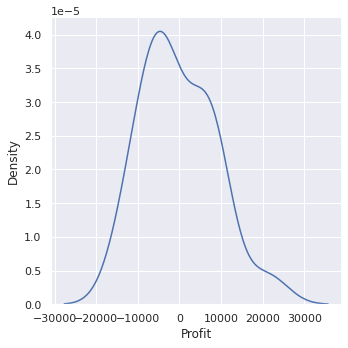

In [ ]:
sns.displot(y_test-y_predict_rf, kind='kde')

In [ ]:
data1 = pd.DataFrame(data={"Predicted Profit":y_predict_rf.flatten(),'Actual value':y_test})
data.head()

,Predicted Profit,Actual value
28,103788.391058,103282.38
11,134232.160331,144259.40
10,135016.937131,146121.95
41,71906.022284,77798.83
2,182417.447894,191050.39


PREDICTING ACCURACY

In [ ]:
# predicting the accuracy score
score=r2_score(y_predict_rf,y_test)*100
print('R2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_predict_rf))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_predict_rf)))

R2 socre is 94.39868891921792
mean_sqrd_error is== 72846156.32991551
root_mean_squared error of is== 8534.995977147002


XGBOOST

In [ ]:
import xgboost as xgb
xg = xgb.XGBRegressor(learning_rate=0.1,max_depth=50,n_estimators=50)
xg.fit(X_train,y_train)

[11:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=50, n_estimators=50)

In [ ]:
xg.score(X_test,y_test)

0.9232820910779436

In [ ]:
xg_prediction = xg.predict(X_test)

In [ ]:
data = pd.DataFrame(data={"Predicted Profit":xg_prediction,"Actual Profit":y_test})
data.head()

,Predicted Profit,Actual Profit
28,102842.546875,103282.38
11,125317.398438,144259.40
10,132674.093750,146121.95
41,81183.265625,77798.83
2,180318.562500,191050.39


Accuracy of XGBOOST

In [ ]:
# predicting the accuracy score
score=r2_score(xg_prediction,y_test)*100
print('R2 scoreis' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,xg_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,xg_prediction)))

R2 scoreis 93.34152830266963
mean_sqrd_error is== 96817526.40536232
root_mean_squared error of is== 9839.58974781786


## BACKWARD ELIMINATION

Backward elimination is a feature selection technique while building a machine learning model. It is used to remove those features that do not have a significant effect on the dependent variable or prediction of output. There are various ways to build a model in Machine Learning, which are:

** All-in
Backward Elimination
Forward Selection
Bidirectional Elimination
Score Comparison
Above are the possible methods for building the model in Machine learning, but we will only use here the Backward Elimination process as it is the fastest method.*

In [ ]:
print("Train Score:",lr.score(X_train,y_train))
print("Test Score: ",lr.score(X_test,y_test))

Train Score: 0.9565135512205664
Test Score:  0.932245761263358


In [ ]:
print("Difference between train and test score : ", lr.score(X_train,y_train) - lr.score(X_test,y_test) )

Difference between train and test score :  0.024267789957208352


that model is not optimal, as we have included all the independent variables and do not know which independent model is most affecting and which one is the least affecting for the prediction.

Unnecessary features increase the complexity of the model. Hence it is good to have only the most significant features and keep our model simple to get the better result.

So, in order to optimize the performance of the model, we will use the Backward Elimination method. This process is used to optimize the performance of the MLR model as it will only include the most affecting feature and remove the least affecting feature. Let's start to apply it to our MLR model.

In [ ]:
import statsmodels.api as smf 

In [ ]:
X = np.append(arr = np.ones((50,1)).astype(int), values=X, axis=1)  

In [ ]:
X

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 1.3187690e+05, 9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 1.3461546e+05, 1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 1.2054252e+05, 1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 1.2333488e+05, 1.0867917e+05, 3.0498162e+05],
       [1.0000000e+00, 1.0191308e+05, 1.1059411e+05, 2.2916095e+05],
       [1.0000000e+00, 1.0067196e+05, 9.1790610e+04, 2.4974455e+05],
       [1.0000000e+00, 9.3863750e+04, 1.2732038e+05, 2.4983944e+05],
       [1.0000000e+00, 9.1992390e+04, 1.3549507e+05, 2.5266493e+05],
       [1.0000000e+00, 1.1994324e+

In [ ]:
x_opt=X[:, [0,1,2,3]]  
regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        11:17:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

HERE X3 & X4 having high pvalue

In [ ]:
x_opt=X[:, [0,1,3]]  
regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           2.16e-31
Time:                        11:17:51   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_opt=X[:, [0,1]]  
regressor_OLS=smf.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           3.50e-32
Time:                        11:17:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
x_ba = df.drop(['Profit','Marketing Spend','Administration'],axis=1)

In [ ]:
y_ba = df['Profit']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_ba,x_test_ba,y_train_ba,y_test_ba = train_test_split(x_ba,y_ba,test_size=0.4,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_ba = LinearRegression()
lr_ba.fit(np.array(x_train_ba).reshape(-1,1), y_train_ba)  


LinearRegression()

In [ ]:
print('Train Score: ', lr_ba.score(x_train_ba, y_train_ba))  
print('Test Score: ', lr_ba.score(x_test_ba, y_test_ba))  

Train Score:  0.9525290368358814
Test Score:  0.9311201823964024


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
print("Difference between train and test score : ", lr_ba.score(x_train_ba,y_train_ba) - lr_ba.score(x_test_ba,y_test_ba) )

Difference between train and test score :  0.02140885443947904


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


As we can see, the training score is 95% accurate, and the test score is also 93% accurate. The difference between both scores is .00214. This score is very much close to the previous score, i.e., 0.0242, where we have included all the variables.